(5) Data Exploration

In [1]:
using DataFrames, Gadfly

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /opt/julia_packages/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /opt/julia_packages/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /opt/julia_packages/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /opt/julia_packages/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
# load data
tax = readtable("incomeTaxData.csv")

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place_of_Residence_Sort_Order,Income_Class_Sort_Order
1,2011,Hamilton,"500,000 and over",d/,NA,NA,NA,NA,NA,NA,NA,26,13
2,2003,Dutchess,"100,000 - 199,999",NA,12738,1668991,261775,16628,1390589,91652,87689,19,10
3,2001,Ontario,Total,NA,44898,1829734,449962,25393,1354378,77454,72764,38,12
4,2012,New York City - Richmond,"30,000 - 39,999",NA,16086,559918,192402,10519,356997,17286,12238,5,5
5,2007,Clinton,"50,000 - 59,999",NA,2197,120482,29429,1649,89404,4738,4220,15,7
6,1999,Saratoga,Total,NA,88920,3969074,883753,51293,3034030,175973,169908,47,12
7,2010,Onondaga,"60,000 - 74,999",NA,13837,928570,195635,11010,721925,40503,37426,37,8
8,2008,Ulster,"40,000 - 49,999",NA,5971,266988,77044,3435,186509,9728,8672,57,6
9,2005,Clinton,Total,NA,33634,1284580,332270,17436,934774,53837,44740,15,12
10,2007,Livingston,"200,000 - 249,999",NA,104,22811,2165,135,20511,1405,872,30,11


You can see just from the first line of the dataset that the there are some rows with no returns associated with it. Let's delete those from the dataset.

Also note that all of the data is in thousands of dollars.

In [3]:
# clean data
tax = tax[!isna(tax[:ReturnCount]), :];
sort(tax, cols = :Year)

# create new columns
tax[:avg_tax] = tax[:TotalTaxLiability]./tax[:ReturnCount];

# a)

Plot the number of returns in Tompkins County over time.


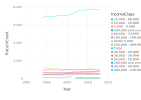

In [4]:
tompkins = tax[tax[:County].=="Tompkins",:]
plot(tompkins,x=:Year,y=:ReturnCount,color=:IncomeClass,Geom.line, )


Plot the average income tax per return in Tompkins County (disregarding income tax).

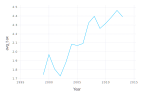

In [5]:
tompkins_total = tompkins[tompkins[:IncomeClass] .== "Total",:]
sort!(tompkins_total, cols=:Year)
plot(tompkins_total,x=:Year,y=:avg_tax,Geom.line)


(a)  I chose to use a line diagram because the data has a upward trend and also you can see the values avg_tax could take between years better than when using a scatter plot.

What kind of plot did you choose to make? Why?

# b)

Continuing to look only at Tompkins County and disregarding income class, fit a model that predicts avg_tax using the year number. Do this with least squares.

 in depwarn at deprecated.jl:73
 in color at /opt/julia_packages/.julia/v0.4/Colors/src/parse.jl:152
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 8


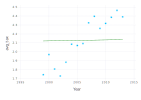

In [6]:
#top has data only from Tompkins county
top = tompkins_total[:,[1,14]]
X_1 = top[:Year].data
Y = top[:avg_tax].data
w_1=X_1\Y

top[:pred_linear1] = X_1.*w_1
plot(top,x=:Year,y=:avg_tax,Geom.point, layer(x=:Year, y=:pred_linear1, Geom.line, Theme(default_color=color("green"))))

Transform the input to include an offset term in the model. Call the coefficients from this model $w^b$

 in depwarn at deprecated.jl:73
 in color at /opt/julia_packages/.julia/v0.4/Colors/src/parse.jl:152
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 8


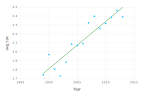

In [7]:
n = size(top,1)
X = [top[:Year].data ones(n)]
Y = top[:avg_tax].data
wᵇ = X\Y

top[:pred_linear] = X*wᵇ

plot(top,x=:Year,y=:avg_tax,Geom.point, layer(x=:Year, y=:pred_linear, Geom.line, Theme(default_color=color("green"))))

# c)

Now we will change the feature space.
Fit a model using the year and the avg_tax from the previous year.

In [8]:
X = [top[:Year].data[2:end] top[:avg_tax].data[1:end-1] ones(n-1)]
#curret year but previous avg tax
Y = top[:avg_tax].data[2:end]
wᶜ=X\Y
top[:pred_ar1] = vcat(top[:pred_linear][1], X*wᶜ);

top

# Error
z=0
    for j = 1:14
        z = sum((z + (Y[j] - (X[j,:]*wᶜ)')^2))
    end

    z = z/14
z

0.009400598256713369

In [9]:
wᶜ

3-element Array{Float64,1}:
   0.0414693
   0.191076 
 -81.4554   

In [10]:
top

,Year,avg_tax,pred_linear1,pred_linear,pred_ar1
1,1999,1.7435400516795865,2.121354296811136,1.7591920517303379,1.7591920517303379
2,2000,1.9692334037330899,2.1224155045634174,1.8119220374186256,1.8163035427453593
3,2001,1.8072386213245872,2.123476712315699,1.864652023106899,1.9008973756976388
4,2002,1.7293821077659057,2.124537920067981,1.9173820087951867,1.9114133514208334
5,2003,1.8835020473157416,2.1255991278202626,1.9701119944834602,1.9380061221586828
6,2004,2.0851967166713843,2.126660335572544,2.022841980171748,2.008924001266763
7,2005,2.0706494236716333,2.1277215433248258,2.0755719658600214,2.08893226444647
8,2006,2.0927073204611752,2.128782751077108,2.128301951548295,2.1276219011571555
9,2007,2.324147544499249,2.1298439588293894,2.1810319372365825,2.1733059072643215
10,2008,2.397620735838651,2.130905166581671,2.233761922924856,2.258997828923853


Call these coefficients $w^c$. Interpret these coefficients. What do they mean?

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

(c)  wᶜ coefficients are predictions of average tax based on the current year and the value of the previous average tax. The coefficients predict the value avg_tax will take for each year.

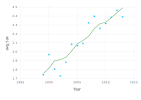

In [11]:

plot(top,x=:Year, y=:avg_tax,Geom.point, layer(x=:Year, y=:pred_ar1, Geom.line, Theme(default_color=color("green"))))


(c)  I do not think the model fits too well because it looks quite linear. The predictions are not too sensitive to variability in the data.

# d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

Fit this model and interpret the coefficients. Call these $w^d$ 

In [12]:
#TotalExemptions, TotalTaxLiability
top[:TotalExemptions] = tompkins_total[:,8]
top[:TotalTaxLiability] = tompkins_total[:,11]
top

X_4 = [top[:Year].data[2:end] top[:avg_tax].data[1:end-1] top[:TotalExemptions].data[1:end-1] top[:TotalTaxLiability].data[1:end-1] ones(n-1)]
Y = top[:avg_tax].data[2:end]
wᵈ=X_4\Y
top[:pred_Four] = vcat(top[:pred_linear][1], X_4*wᵈ);
wᵈ

5-element Array{Float64,1}:
    0.0598501  
    0.990377   
    0.000155315
   -2.13571e-5 
 -121.014      

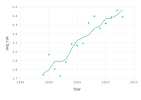

In [13]:
plot(top,x=:Year, y=:avg_tax,Geom.point, layer(x=:Year, y=:pred_Four, Geom.line, Theme(default_color=color("green"))))

(d)  My new model feature space X includes current Year, previous value of avg_tax, previous value of TotalExemptions, previous value of TotalTaxLiability. X is (Year,avg_tax,TotalExemptions,TotalTaxLiability). I think total exemptions can predict avg_tax because the more exemptions you have, the less taxes you pay. Also, tax liability is the amount people have to pay a tax authroity so it should help predict avg_tax.

(d)  wᵈ coefficients predict the avg_tax based on the current year and last year's: avg_tax, TotalExemptions, TotalTaxLiability. The numbers represent the predicted average tax of a given year.

# e)

(e)  Compare the coefficients from part c and d (that is $w_c$ and $w_d$). Does the coefficient of avg_tax (of the previous year) differ in the two models? If so, how do you interpret this difference?

(e)  wᵈ avg_tax has a higher coefficient than in wᶜ. wᵈ does not put much significance on the 2 features I added. avg_tax differs in the two models because adding features changes the weights of the previous features. 

# f)

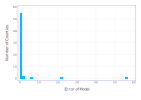

In [20]:
using DataStructures
county_total = tax[tax[:IncomeClass] .== "Total",:]
sort!(county_total, cols=[:County,:Year])
county_total = county_total[county_total[:County].!="NYS Unclassified +",:]
county_total = county_total[county_total[:County].!="Residence Unknown ++",:]
county_total = county_total[county_total[:County].!="Grand Total, Full-Year Resident",:]

q = counter(county_total[:County].data)
q
#Greene
#Hamilton
county_total = county_total[county_total[:County].!="Greene",:]
county_total = county_total[county_total[:County].!="Hamilton",:]
r = counter(county_total[:County].data)

Least_Squares = Float64[]
z = 0
for i = 1:60
    X = [top[:Year].data[2:end] top[:avg_tax].data[1:end-1] ones(14)]
    Y = county_total[:avg_tax].data[2+((i-1)*15):i*15]
    
    for j = 1:14
        z = sum((z + (Y[j] - (X[j,:]*wᶜ)')^2))
    end

    z = z/14
    push!(Least_Squares, z)
    
z=0
end


Gadfly.plot(x=Least_Squares[1:end], Geom.histogram, Theme(panel_fill=color("White"), panel_stroke=color("Blue")), Guide.ylabel("Number of Counties"), Guide.xlabel("Error of Model"))


Now we want to see how this model performs in other counties. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

Are there major outliers?

(f)  All the errors are higher than when predicting just for Tompkins county. This happened because the model is trained on Tompkin's data. The major outliers are Chautauqua(21.55), New York City - Richmond(56.848), and Lewis(5.758).

In [15]:
for i = 1:60
if Least_Squares[i] .> 3
    println(Least_Squares[i])
        println(i)
    
end
end

5.758264717300681
26
56.84817975317441
29
21.55147835399642
58


In [16]:
r

DataStructures.Accumulator{UTF8String,Int64}(Dict("Onondaga"=>15,"Steuben"=>15,"Chautauqua"=>15,"Otsego"=>15,"Wyoming"=>15,"Ontario"=>15,"Clinton"=>15,"Tompkins"=>15,"New York City - Kings"=>15,"Delaware"=>15,"Rockland"=>15,"New York City - Queens"=>15,"Cayuga"=>15,"Erie"=>15,"Orange"=>15,"Nassau"=>15,"Niagara"=>15,"Warren"=>15,"Schuyler"=>15,"Fulton"=>15,"Columbia"=>15,"Franklin"=>15,"Tioga"=>15,"Chenango"=>15,"Genesee"=>15,"New York City - Manhattan"=>15,"Schoharie"=>15,"Madison"=>15,"Ulster"=>15,"Oswego"=>15,"Livingston"=>15,"New York City - Richmond"=>15,"Cortland"=>15,"New York City - Bronx"=>15,"Lewis"=>15,"St. Lawrence"=>15,"Sullivan"=>15,"Oneida"=>15,"Orleans"=>15,"Cattaraugus"=>15,"Seneca"=>15,"Saratoga"=>15,"Chemung"=>15,"Schenectady"=>15,"Broome"=>15,"Herkimer"=>15,"Rensselaer"=>15,"Putnam"=>15,"Essex"=>15,"Monroe"=>15,"Albany"=>15,"Jefferson"=>15,"Westchester"=>15,"Wayne"=>15,"Dutchess"=>15,"Suffolk"=>15,"Montgomery"=>15,"Allegany"=>15,"Yates"=>15,"Washington"=>15))

# g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

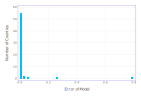

In [17]:
Least_Squares2 = Float64[]
z = 0
for i = 1:60
    X = [county_total[:Year].data[2+((i-1)*15):i*15] county_total[:avg_tax].data[((i-1)*15)+1:i*14+(i-1)] county_total[:TotalExemptions].data[((i-1)*15)+1:i*14+(i-1)] county_total[:TotalTaxLiability].data[((i-1)*15)+1:i*14+(i-1)] ones(14)]
    
    Y = county_total[:avg_tax].data[2+((i-1)*15):i*15]
    wᵈ=X\Y
    for j = 1:14
        z = sum((z + (Y[j] - (X[j,:]*wᵈ)')^2))
    end

    z = z/14
    push!(Least_Squares2, z)
    
z=0
end

Gadfly.plot(x=Least_Squares2[1:end], Geom.histogram, Theme(panel_fill=color("White"), panel_stroke=color("Blue")), Guide.ylabel("Number of Counties"), Guide.xlabel("Error of Model"))

Again, are there major outliers? How do the coefficients compare across counties?

(g)  This error distribution is a lot better than when using only the Tompkins model. All errors are under 1. The major outliers are Chautauqua and New York City - Richmond. The coefficients differ quite a bit.

(h)  To predict income tax for each county, we should use county-specific models because using data to fit each model specifically ensures that each model captures how each county behaves differently in taxes. Tompkins county model would fit only Tompkins county well and counties with similar tax history. The model does not generalize well to other counties. The county-specific models have a chance of overfitting which would make out of sample error high.

(i)  I would like to use information like GDP of each county as well as perhaps number of malls in each county to get a sense of which counties have more wealth (and therefore higher taxes).

In [18]:
for i = 1:60
if Least_Squares2[i] .> 0.1
    println(Least_Squares2[i])
        println(i)
    
end
end

0.7901749154489558
29
0.2612889378184053
58


In [19]:
r

DataStructures.Accumulator{UTF8String,Int64}(Dict("Onondaga"=>15,"Steuben"=>15,"Chautauqua"=>15,"Otsego"=>15,"Wyoming"=>15,"Ontario"=>15,"Clinton"=>15,"Tompkins"=>15,"New York City - Kings"=>15,"Delaware"=>15,"Rockland"=>15,"New York City - Queens"=>15,"Cayuga"=>15,"Erie"=>15,"Orange"=>15,"Nassau"=>15,"Niagara"=>15,"Warren"=>15,"Schuyler"=>15,"Fulton"=>15,"Columbia"=>15,"Franklin"=>15,"Tioga"=>15,"Chenango"=>15,"Genesee"=>15,"New York City - Manhattan"=>15,"Schoharie"=>15,"Madison"=>15,"Ulster"=>15,"Oswego"=>15,"Livingston"=>15,"New York City - Richmond"=>15,"Cortland"=>15,"New York City - Bronx"=>15,"Lewis"=>15,"St. Lawrence"=>15,"Sullivan"=>15,"Oneida"=>15,"Orleans"=>15,"Cattaraugus"=>15,"Seneca"=>15,"Saratoga"=>15,"Chemung"=>15,"Schenectady"=>15,"Broome"=>15,"Herkimer"=>15,"Rensselaer"=>15,"Putnam"=>15,"Essex"=>15,"Monroe"=>15,"Albany"=>15,"Jefferson"=>15,"Westchester"=>15,"Wayne"=>15,"Dutchess"=>15,"Suffolk"=>15,"Montgomery"=>15,"Allegany"=>15,"Yates"=>15,"Washington"=>15))